In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

In [ ]:
ins = pd.read_csv("insurance.csv")

In [ ]:
ins.shape

(1338, 7)

In [ ]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ins.duplicated().sum()

np.int64(1)

In [ ]:
duplicated_rows = ins[ins.duplicated(keep=False)]
duplicated_rows

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
ins = ins.drop(index=581)

In [ ]:
ins.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
def find_outliers_iqr(data, column, factor=1):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_ibm = find_outliers_iqr(ins, 'age')
outliers_ibm

,age,sex,bmi,children,smoker,region,charges


In [ ]:
def find_outliers_iqr(data, column, factor=2):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_ibm = find_outliers_iqr(ins, 'bmi')
outliers_ibm

,age,sex,bmi,children,smoker,region,charges
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [ ]:
ins = ins.drop(index=[1047, 1317])

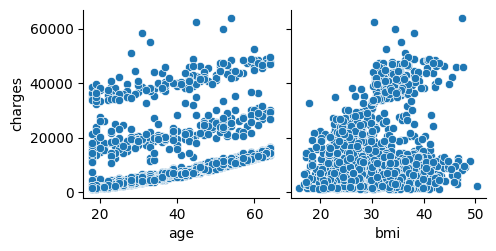

In [ ]:
sns.pairplot(ins, x_vars=['age', 'bmi'], y_vars='charges', aspect=1, kind='scatter')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
ins['sex'] = LE.fit_transform(ins['sex'] )
ins['smoker'] = LE.fit_transform(ins['smoker'] )
ins['region'] = LE.fit_transform(ins['region'] )

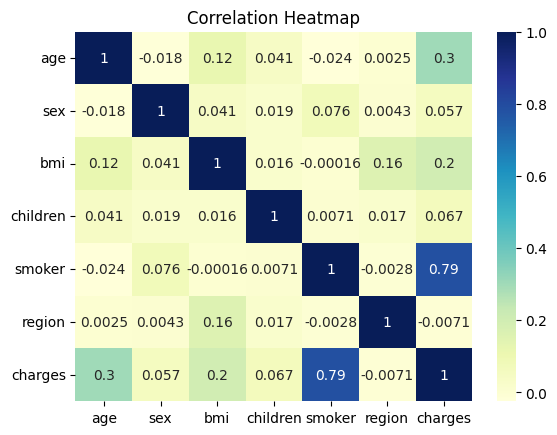

In [ ]:
sns.heatmap(ins.corr(), cmap="YlGnBu", annot = True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
ins = ins.drop(['region'], axis=1)
ins = ins.drop(['sex'], axis=1)
ins = ins.drop(['children'], axis=1)

In [ ]:
x = ins.iloc[:,:-1].values
y = ins.iloc[:,-1].values

In [ ]:
ins.iloc[:,-1].values

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
ins.iloc[:,:-1].values

array([[19.  , 27.9 ,  1.  ],
       [18.  , 33.77,  0.  ],
       [28.  , 33.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  1.  ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
#print(regressor.intercept_)

#print(regressor.coef_)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4322.592945009004
Mean Squared Error: 40231222.19303882
Root Mean Squared Error: 6342.808699073213


In [ ]:

from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test, y_pred))

# Evaluating the model using Adjusted R² Evaluation Metric
adj_r2 = 1 - (1-r2_score(y_test, y_pred))*(len(y_pred)-1)/(len(y_pred)-x_test.shape[1]-1)
print("Adjusted R2 score:", adj_r2)

R2 score: 0.7393902624501332
Adjusted R2 score: 0.7370210830178616
